<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MANE 4961: Machine Learning for Engineering HW 1**

Gavin MacKenzie: Solutions (662020762)

## 1. Consider feature vectors, $\mathbf{x_1} = [2\ 3\ 4\ 8\ 9]^T$ and $\mathbf{x_2} = [2\ -3\ -4\ 89]^T$.

  (a) How many features are there in $\mathbf{x_1}$ and $\mathbf{x_2}$?

  (b) What are the $L_1$, $L_2$, and $L_{\infty}$ norms for each feature vector?

1a) There are 5 features in $\mathbf{x_1}$ and 4 features in $\mathbf{x_2}$.

### 1b) The code for calculating the norms and the results are below.

In [ ]:
import numpy as np
from math import inf

x1 = np.array([2, 3, 4, 8, 9])
x2 = np.array([2, -3, -4, 89])

print("L\u2081 norm for x\u2081 is: ", np.linalg.norm(x1, 1))
print("L\u2081 norm for x\u2082 is: ", np.linalg.norm(x2, 1))
print()
print("L\u2082 norm for x\u2081 is: ", np.linalg.norm(x1, 2))
print("L\u2082 norm for x\u2082 is: ", np.linalg.norm(x2, 2))
print()
print("L\u221e norm for x\u2081 is: ", np.linalg.norm(x1, inf))
print("L\u221e norm for x\u2082 is: ", np.linalg.norm(x2, inf))

L₁ norm for x₁ is:  26.0
L₁ norm for x₂ is:  98.0

L₂ norm for x₁ is:  13.19090595827292
L₂ norm for x₂ is:  89.16277250063504

L∞ norm for x₁ is:  9.0
L∞ norm for x₂ is:  89.0


## 2. A color image of size $1024$x$1024$ is input to an algorithm which outputs a $64$x$64$ color image representing some important portions of the original image.

  (a) If the input is converted to a vector, $\mathbf{x}$, calculate the length of the feature vector.

  (b) If the output is converted to a vector, $\mathbf{y}$, calculate the length of the feature vector.

  (c) The algorithm relates the input and output vecotrs, $\mathbf{x}$ and $\mathbf{y}$ respectively, as $\mathbf{y} = W\mathbf{x} + \mathbf{b}$, where $W$ is a matrix and $\mathbf{b}$ is a vector. How many elements are there in matrix $W$? How many elements are in vector b?
    


2a) The feature vector length is the total number of input features, 1024 times 1024, or 1048576.

2b) the output vector length is the total number of outputs, 64 times 64, or 4096.

2c) To satisfy the equation and requirements of vector addition, the length of vector b must be equal to the length of vector y. The length of y is 4096, so b must have 4096 elements.

To satisfy vector-matrix multiplication, the columns in matrix W must equal the rows (or length) or vector x. To ensure the resulting product has the same length as vectors y and b, the number of rows in matrix W must equal the length of y and b. This results in matrix W having 4096 rows and 1048576 columns, for a total of 4.294967296$\times10^{9}$ elements.

## 3. Calculate the 1-norm, 2-norm, $\infty$, and Frobenius norm of

$
W = \begin{bmatrix}
1 & -1\\
2 & 0
\end{bmatrix}
$

In [ ]:
import numpy as np
from math import inf

w = np.array([ [1, -1],
               [2,  0] ])

print("L\u2081 norm for W\u2081 is: ", np.linalg.norm(w, 1))
print()
print("L\u2082 norm for w\u2081 is: ", np.linalg.norm(w, 2))
print()
print("L\u221e norm for w\u2081 is: ", np.linalg.norm(w, inf))
print()
print("Frobenius norm for w\u2081 is: ", np.linalg.norm(w, 'fro'))

L₁ norm for W₁ is:  3.0

L₂ norm for w₁ is:  2.2882456112707374

L∞ norm for w₁ is:  2.0

Frobenius norm for w₁ is:  2.449489742783178


## 4. Use the Iris dataset and the code shown in class, but choose 3 out of the 4 original features instead of two and calculate the accuracy score of classification.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#import iris dataset
iris = datasets.load_iris()

X = iris.data[:, :3] # selecting first three features
y = iris.target

#split data for training and testing
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

#import support vector machine model and train
clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


## 5. In class, we used a neural network to learn how to calculate square root. Use that code and ideas to teach a neural network how to calculate the 7-th root of any integer between 1 and 100.

In [ ]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

#Load dataset
#split into input (X) and output (y)
X = np.random.randint(1, 100, size=95)
X = X*1.0
y = X**(1/7)

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)


#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=70, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
71.0 => 1.83 (expected 1.84)
34.0 => 1.67 (expected 1.65)
64.0 => 1.80 (expected 1.81)
39.0 => 1.69 (expected 1.69)
88.0 => 1.90 (expected 1.90)
73.0 => 1.84 (expected 1.85)
90.0 => 1.91 (expected 1.90)
16.0 => 1.45 (expected 1.49)
79.0 => 1.87 (expected 1.87)
40.0 => 1.70 (expected 1.69)


/tmp/ipython-input-3352210909.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


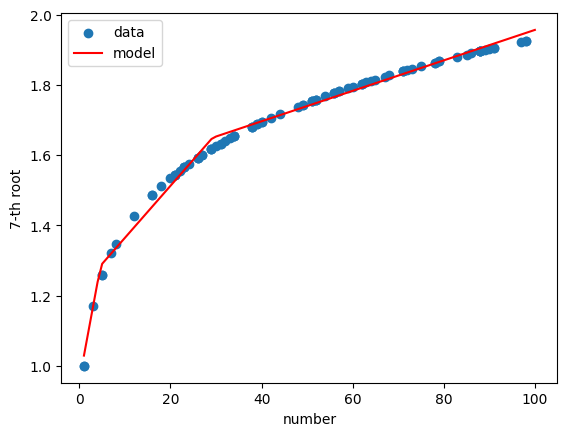

In [ ]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid, model.predict(number_grid), color='red', label='model')
plt.xlabel('number')
plt.ylabel('7-th root')
plt.legend()

## 6. Use the Iris dataset and the neural network code shown in class to create a neural network model that takes sepal length as input and preducts petal length as output.

In [ ]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()
ir = iris.data
#split into input (X) and output (y)
X = ir[:,0]
y = ir[:,2]

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)


#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=70, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5.1 => 2.34 (expected 1.40)
4.9 => 1.93 (expected 1.40)
4.7 => 1.52 (expected 1.30)
4.6 => 1.31 (expected 1.50)
5.0 => 2.14 (expected 1.40)
5.4 => 2.97 (expected 1.70)
4.6 => 1.31 (expected 1.40)
5.0 => 2.14 (expected 1.50)
4.4 => 0.89 (expected 1.40)
4.9 => 1.93 (expected 1.50)


/tmp/ipython-input-3657903633.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


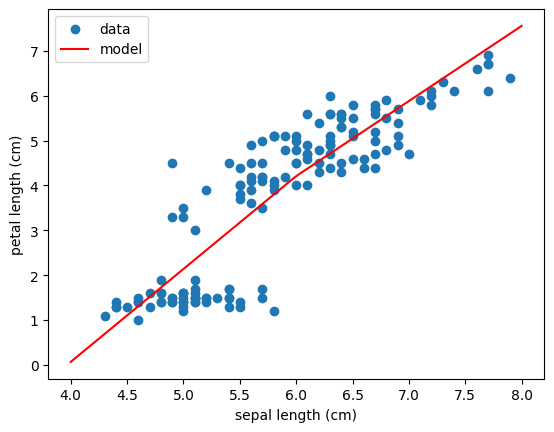

In [ ]:
import matplotlib.pyplot as plt
number_grid = np.linspace(4, 8, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid, model.predict(number_grid), color='red', label='model')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend()

